In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [3]:
from IPython.display import HTML
style = '<style>svg{width:50% !important; height:10% !important;}</style>'
HTML(style)

# Подготовка баз данных

In [4]:
data_train = pd.read_csv('https://stepic.org/media/attachments/course/4852/train_iris.csv')

In [5]:
data_train.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,130,7.4,2.8,6.1,1.9,2
1,7,5.0,3.4,1.5,0.2,0
2,11,4.8,3.4,1.6,0.2,0
3,142,5.8,2.7,5.1,1.9,2
4,109,7.2,3.6,6.1,2.5,2


In [6]:
data_test = pd.read_csv('https://stepic.org/media/attachments/course/4852/test_iris.csv')

In [7]:
data_test.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,114,5.8,2.8,5.1,2.4,2
1,70,5.9,3.2,4.8,1.8,1
2,138,6.0,3.0,4.8,1.8,2
3,59,5.2,2.7,3.9,1.4,1
4,44,5.1,3.8,1.9,0.4,0


In [8]:
data_train.isnull().sum()

Unnamed: 0      0
sepal length    0
sepal width     0
petal length    0
petal width     0
species         0
dtype: int64

In [9]:
X_train = data_train.drop(['Unnamed: 0', 'species'], axis = 1)

In [10]:
X_train.head()

,sepal length,sepal width,petal length,petal width
0,7.4,2.8,6.1,1.9
1,5.0,3.4,1.5,0.2
2,4.8,3.4,1.6,0.2
3,5.8,2.7,5.1,1.9
4,7.2,3.6,6.1,2.5


In [11]:
X_test = data_test.drop(['Unnamed: 0', 'species'], axis = 1)

In [12]:
X_test.head()

,sepal length,sepal width,petal length,petal width
0,5.8,2.8,5.1,2.4
1,5.9,3.2,4.8,1.8
2,6.0,3.0,4.8,1.8
3,5.2,2.7,3.9,1.4
4,5.1,3.8,1.9,0.4


In [13]:
# Создаем переменные, которые предсказываем
y_train = data_train.species

In [14]:
y_test = data_test.species

# ОБУЧЕНИЕ

In [15]:
clf = tree.DecisionTreeClassifier (criterion = 'entropy')

In [16]:
clf.fit (X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [17]:
clf.score(X_train, y_train)

1.0

In [18]:
clf.score(X_test, y_test)

0.94

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
rs = np.random.seed(0)

In [21]:
# Определяем новую базу
scores_data = pd.DataFrame()

In [22]:
# Определяем переменную max_depth_values:
max_depth_values = range(1, 100)

In [23]:
# Пишем цикл для поиска оптимальной глубины и сохраняем полученные данные в новую базу:
for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth, random_state=rs)
    clf.fit(X_train, y_train)
    train_score = clf.score (X_train, y_train)
    test_score = clf.score (X_test, y_test)   
    
    temp_score_data = pd.DataFrame ({'max_depth' : [max_depth],
                                    'train_score' : [train_score],
                                    'test_score' : [test_score]})
    
    scores_data = scores_data.append (temp_score_data)

In [24]:
scores_data.head()

,max_depth,train_score,test_score
0,1,0.70,0.60
0,2,0.97,0.94
0,3,0.99,0.94
0,4,1.00,0.92
0,5,1.00,0.92


# ВИЗУАЛИЗАЦИЯ

In [27]:
# Нужно преобразовать scores_data так, чтобы для каждой строки были созданы 2 новые:
# одна со значением точности на тренировочных данных, другая на тестовых.
# В новом scores_data_long (он long, потому что в нем в два раза больше строк)
# останется колонка max_depth, которую мы будем использовать как x и появится всего одна колонка score,
# которую будем использовать как y. Дополнительная третья колонка set_type разделит строки для отрисовки двух линий
# var_name - какой тип ключа будем использовать 
scores_data_long = pd.melt (scores_data, id_vars = ['max_depth'], value_vars = ['train_score', 'test_score'],
                           var_name = 'set_type', value_name = 'score')

In [32]:
scores_data_long.head()

,max_depth,set_type,score
0,1,train_score,0.70
1,2,train_score,0.97
2,3,train_score,0.99
3,4,train_score,1.00
4,5,train_score,1.00


<AxesSubplot:xlabel='max_depth', ylabel='score'>

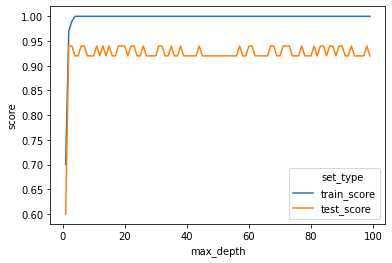

In [34]:
# Изобразить на графике зависимость точности от глубины, и сделать это двумя линиями (train и test)
# Выбираем такую функцию pandas, которой можем дать только один x и y
sns.lineplot (x = 'max_depth', y = 'score', hue = 'set_type', data = scores_data_long)